In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
import env
from sklearn.model_selection import train_test_split
from requests import get
from bs4 import BeautifulSoup
import os

In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
# acquire data from spam_db

from env import user, pwd, host

def get_db_url(database, host=host, user=user, password=pwd):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url)
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.to_csv('ham.csv')

In [7]:
df.head()

,id,label,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df = df.drop(columns='id')

In [10]:
train_validate, test = train_test_split(df,
                                        random_state=1349,
                                        train_size=0.8,
                                       stratify=df.label)
train, validate = train_test_split(train_validate,
                                   random_state=1349,
                                   train_size=0.7,
                                  stratify=train_validate.label)

In [11]:
train.shape,validate.shape,test.shape

((3119, 2), (1338, 2), (1115, 2))

In [12]:
ham_df = train[train.label == 'ham']

In [15]:
ham_words = clean(' '.join(train[train['label']=='ham']['text']))

In [17]:
spam_words = clean(' '.join(train[train['label']=='spam']['text']))
all_words = clean(' '.join(train['text']))

In [18]:
len(ham_words), len(spam_words), len(all_words)

(21681, 6815, 28496)

In [21]:
len(ham_words) + len(spam_words) == len(all_words)

True

In [22]:
ham_freq = pd.Series(ham_words).value_counts()

In [23]:
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [24]:
ham_freq.head()

im      254
get     198
ok      158
go      148
know    142
dtype: int64

In [25]:
# concat all frequencies together into a dataframe
word_counts = pd.concat([ham_freq, spam_freq,all_freq], axis=1
         ).fillna(0
                 ).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,254,8,262
get,198,45,243
ok,158,3,161
go,148,20,168
know,142,16,158


## Bigrams

## HAM

In [30]:
ham_bigrams = list(nltk.bigrams(ham_words))

In [31]:
ham_bigrams

[('er', 'hello'),
 ('hello', 'thing'),
 ('thing', 'didnut'),
 ('didnut', 'quite'),
 ('quite', 'go'),
 ('go', 'plan'),
 ('plan', 'uo'),
 ('uo', 'limping'),
 ('limping', 'slowly'),
 ('slowly', 'home'),
 ('home', 'followed'),
 ('followed', 'aa'),
 ('aa', 'exhaust'),
 ('exhaust', 'hanging'),
 ('hanging', 'still'),
 ('still', 'around'),
 ('around', 'could'),
 ('could', 'use'),
 ('use', 'half8th'),
 ('half8th', 'anything'),
 ('anything', 'lor'),
 ('lor', 'go'),
 ('go', 'go'),
 ('go', 'lor'),
 ('lor', 'watching'),
 ('watching', 'tv'),
 ('tv', 'got'),
 ('got', 'new'),
 ('new', 'job'),
 ('job', 'slept'),
 ('slept', 'timeyou'),
 ('timeyou', 'compliment'),
 ('compliment', 'away'),
 ('away', 'system'),
 ('system', 'side'),
 ('side', 'right'),
 ('right', 'though'),
 ('though', 'cant'),
 ('cant', 'give'),
 ('give', 'space'),
 ('space', 'want'),
 ('want', 'need'),
 ('need', 'really'),
 ('really', 'starting'),
 ('starting', 'become'),
 ('become', 'issue'),
 ('issue', 'going'),
 ('going', 'suggest'),
 

In [41]:
ham_bigrams[0][0]+'_'+ham_bigrams[0][1]

'er_hello'

In [49]:
'_'.join(ham_bigrams[0])

'er_hello'

In [51]:
bigram_list = ['_'.join(i) for i in ham_bigrams]

In [52]:
bigram_list

['er_hello',
 'hello_thing',
 'thing_didnut',
 'didnut_quite',
 'quite_go',
 'go_plan',
 'plan_uo',
 'uo_limping',
 'limping_slowly',
 'slowly_home',
 'home_followed',
 'followed_aa',
 'aa_exhaust',
 'exhaust_hanging',
 'hanging_still',
 'still_around',
 'around_could',
 'could_use',
 'use_half8th',
 'half8th_anything',
 'anything_lor',
 'lor_go',
 'go_go',
 'go_lor',
 'lor_watching',
 'watching_tv',
 'tv_got',
 'got_new',
 'new_job',
 'job_slept',
 'slept_timeyou',
 'timeyou_compliment',
 'compliment_away',
 'away_system',
 'system_side',
 'side_right',
 'right_though',
 'though_cant',
 'cant_give',
 'give_space',
 'space_want',
 'want_need',
 'need_really',
 'really_starting',
 'starting_become',
 'become_issue',
 'issue_going',
 'going_suggest',
 'suggest_setting',
 'setting_definite',
 'definite_move',
 'move_outif',
 'outif_im',
 'im_still',
 'still_greece',
 'greece_maybe',
 'maybe_ready',
 'ready_hi',
 'hi_baby',
 'baby_im',
 'im_cruisin',
 'cruisin_girl',
 'girl_friend',
 'frie

<AxesSubplot:>

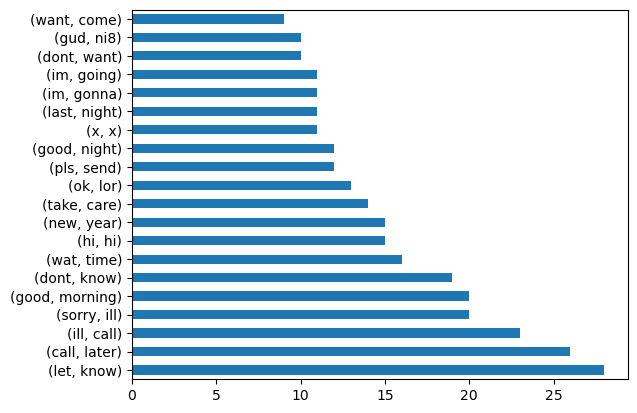

In [28]:
pd.Series(nltk.bigrams(ham_words)).value_counts().head(20).plot.barh()

## SPAM

In [59]:
spam_bigrams = list(nltk.bigrams(spam_words))

In [62]:
bigram_list_spam = ['_'.join(i) for i in spam_bigrams]

<AxesSubplot:>

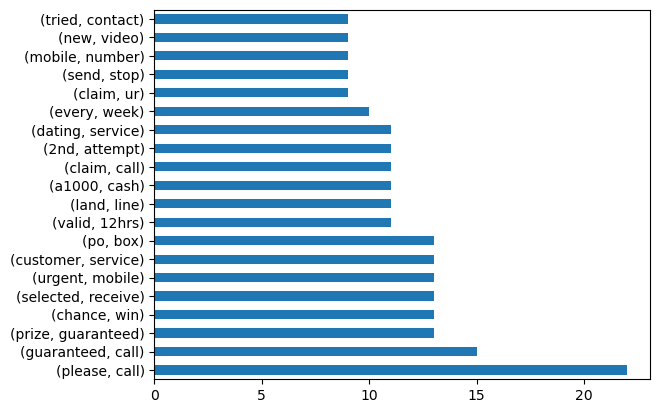

In [64]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(20).plot.barh()

In [91]:
all_bigrams = list(nltk.bigrams(all_words))

In [92]:
bigram_list_all = ['_'.join(i) for i in all_bigrams]

In [29]:
from wordcloud import WordCloud

In [53]:
img = WordCloud(background_color='White',
         ).generate(' '.join(ham_words))

In [33]:
img

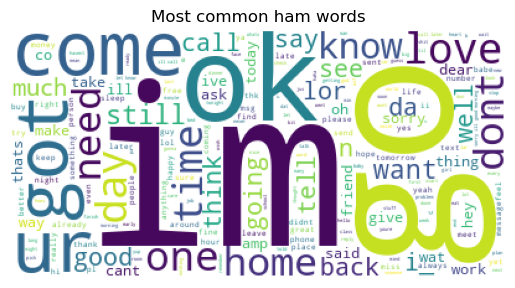

In [55]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham words')
plt.show()

In [56]:
img = WordCloud(background_color='White',
         ).generate(' '.join(bigram_list))

In [57]:
img

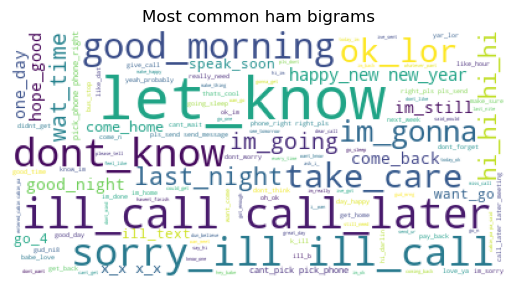

In [58]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham bigrams')
plt.show()

In [89]:
img = WordCloud(colormap='Greys',background_color='firebrick',
         ).generate(' '.join(bigram_list_spam))

In [80]:
img

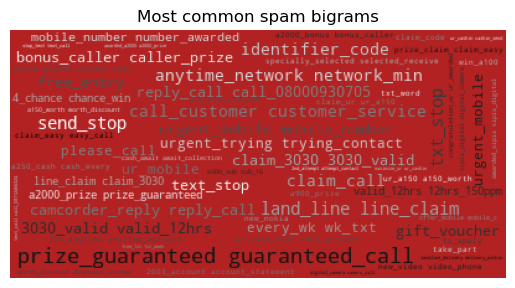

In [90]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common spam bigrams')
plt.show()

## 3 Overlap?

In [93]:
ham_bifreq = pd.Series(bigram_list).value_counts()
spam_bifreq = pd.Series(bigram_list_spam).value_counts()
all_bifreq = pd.Series(bigram_list_all).value_counts()

In [94]:
# concat all frequencies together into a dataframe
bigram_counts = pd.concat([ham_bifreq, spam_bifreq,all_bifreq], axis=1
         ).fillna(0
                 ).astype(int)
bigram_counts.columns = ['ham','spam','all']
bigram_counts.head()

,ham,spam,all
let_know,28,0,28
call_later,26,0,26
ill_call,23,0,23
sorry_ill,20,0,20
good_morning,20,0,20


In [95]:
bigram_counts[(bigram_counts['ham']>0)&(bigram_counts['spam']>0)]

,ham,spam,all
dont_know,19,6,25
new_year,15,1,16
im_home,9,1,10
last_week,7,1,8
first_time,6,1,7
...,...,...,...
text_meet,1,1,2
text_im,1,2,3
hi_babe,1,2,3
min_call,1,1,2


## 4 Now do it all for Tri-grams

## HAM

In [96]:
ham_trigrams = list(nltk.ngrams(ham_words,3))

In [97]:
ham_trigrams

[('er', 'hello', 'thing'),
 ('hello', 'thing', 'didnut'),
 ('thing', 'didnut', 'quite'),
 ('didnut', 'quite', 'go'),
 ('quite', 'go', 'plan'),
 ('go', 'plan', 'uo'),
 ('plan', 'uo', 'limping'),
 ('uo', 'limping', 'slowly'),
 ('limping', 'slowly', 'home'),
 ('slowly', 'home', 'followed'),
 ('home', 'followed', 'aa'),
 ('followed', 'aa', 'exhaust'),
 ('aa', 'exhaust', 'hanging'),
 ('exhaust', 'hanging', 'still'),
 ('hanging', 'still', 'around'),
 ('still', 'around', 'could'),
 ('around', 'could', 'use'),
 ('could', 'use', 'half8th'),
 ('use', 'half8th', 'anything'),
 ('half8th', 'anything', 'lor'),
 ('anything', 'lor', 'go'),
 ('lor', 'go', 'go'),
 ('go', 'go', 'lor'),
 ('go', 'lor', 'watching'),
 ('lor', 'watching', 'tv'),
 ('watching', 'tv', 'got'),
 ('tv', 'got', 'new'),
 ('got', 'new', 'job'),
 ('new', 'job', 'slept'),
 ('job', 'slept', 'timeyou'),
 ('slept', 'timeyou', 'compliment'),
 ('timeyou', 'compliment', 'away'),
 ('compliment', 'away', 'system'),
 ('away', 'system', 'side'),


In [98]:
'_'.join(ham_trigrams[0])

'er_hello_thing'

In [99]:
trigram_list_ham = ['_'.join(i) for i in ham_trigrams]

In [100]:
trigram_list_ham

['er_hello_thing',
 'hello_thing_didnut',
 'thing_didnut_quite',
 'didnut_quite_go',
 'quite_go_plan',
 'go_plan_uo',
 'plan_uo_limping',
 'uo_limping_slowly',
 'limping_slowly_home',
 'slowly_home_followed',
 'home_followed_aa',
 'followed_aa_exhaust',
 'aa_exhaust_hanging',
 'exhaust_hanging_still',
 'hanging_still_around',
 'still_around_could',
 'around_could_use',
 'could_use_half8th',
 'use_half8th_anything',
 'half8th_anything_lor',
 'anything_lor_go',
 'lor_go_go',
 'go_go_lor',
 'go_lor_watching',
 'lor_watching_tv',
 'watching_tv_got',
 'tv_got_new',
 'got_new_job',
 'new_job_slept',
 'job_slept_timeyou',
 'slept_timeyou_compliment',
 'timeyou_compliment_away',
 'compliment_away_system',
 'away_system_side',
 'system_side_right',
 'side_right_though',
 'right_though_cant',
 'though_cant_give',
 'cant_give_space',
 'give_space_want',
 'space_want_need',
 'want_need_really',
 'need_really_starting',
 'really_starting_become',
 'starting_become_issue',
 'become_issue_going',
 'i

<AxesSubplot:>

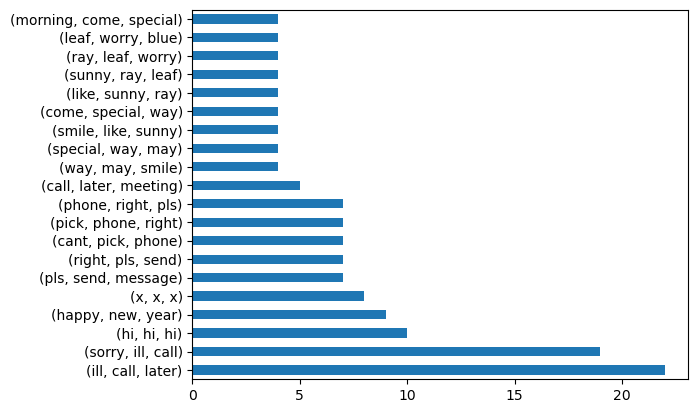

In [101]:
pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(20).plot.barh()

## SPAM and ALL

In [102]:
spam_trigrams = list(nltk.ngrams(spam_words,3))

In [103]:
trigram_list_spam = ['_'.join(i) for i in spam_trigrams]

In [105]:
all_trigrams = list(nltk.ngrams(all_words,3))

In [106]:
trigram_list_all = ['_'.join(i) for i in all_trigrams]

## WORDCLOUDS

In [107]:
img = WordCloud(background_color='White',
         ).generate(' '.join(trigram_list_ham))

In [108]:
img

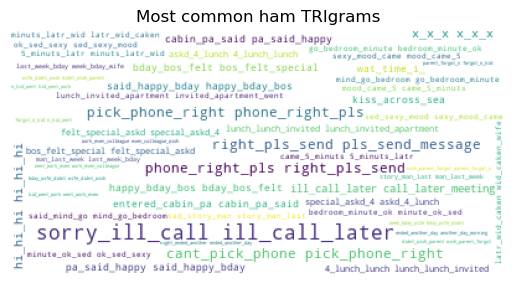

In [109]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common ham TRIgrams')
plt.show()

In [110]:
img = WordCloud(colormap='Greys',background_color='firebrick',
         ).generate(' '.join(trigram_list_spam))

In [111]:
img

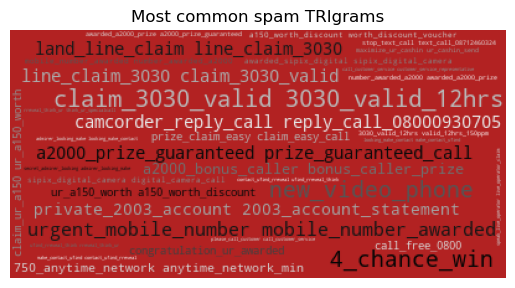

In [112]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common spam TRIgrams')
plt.show()

## Overlap?

In [113]:
ham_trifreq = pd.Series(trigram_list_ham).value_counts()
spam_trifreq = pd.Series(trigram_list_spam).value_counts()
all_trifreq = pd.Series(trigram_list_all).value_counts()

In [114]:
# concat all frequencies together into a dataframe
trigram_counts = pd.concat([ham_trifreq, spam_trifreq,all_trifreq], axis=1
         ).fillna(0
                 ).astype(int)
trigram_counts.columns = ['ham','spam','all']
trigram_counts.head()

,ham,spam,all
ill_call_later,22,0,22
sorry_ill_call,19,0,19
hi_hi_hi,10,0,10
happy_new_year,9,0,9
x_x_x,8,0,8


In [115]:
trigram_counts[(trigram_counts['ham']>0)&(trigram_counts['spam']>0)]

,ham,spam,all
called_left_message,1,1,2
sorry_missed_call,1,1,2


## CODEUP BLOG EXPLORATION

In [118]:
url = 'https://codeup.com/blog/'
headers = {'User-Agent': 'Codeup Data Science'}
response = get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

links = [link['href'] for link in soup.select('.more-link')]

articles = []

for url in links:
    
    url_response = get(url, headers=headers)
    soup = BeautifulSoup(url_response.text)
    
    title = soup.find('h1', class_='entry-title').text
    content = soup.find('div', class_='entry-content').text.strip()
    compiled = re.compile(re.escape(title), re.IGNORECASE)
    content = compiled.sub('', content)
    

    
    article_dict = {
        'title': title,
        'content': content
    }
    
    articles.append(article_dict)

In [119]:
len(articles)

6

In [120]:
blog_article_df = pd.DataFrame(articles)
blog_article_df

,title,content
0,Women in tech: Panelist Spotlight – Magdalena ...,\nCodeup is hosting a Women in Tech Panel in h...
1,Women in tech: Panelist Spotlight – Rachel Rob...,\nCodeup is hosting a Women in Tech Panel in h...
2,Women in Tech: Panelist Spotlight – Sarah Mellor,\nCodeup is hosting a Women in Tech Panel in ...
3,Women in Tech: Panelist Spotlight – Madeleine ...,\nCodeup is hosting a Women in Tech Panel in h...
4,Black Excellence in Tech: Panelist Spotlight –...,\n\nCodeup is hosting a Black Excellence in Te...
5,Black excellence in tech: Panelist Spotlight –...,\nCodeup is hosting our second Black Excellenc...


In [121]:
blog_article_df.to_csv('blog_articles.csv', index=False)

In [122]:
blog_article_df = blog_article_df.drop(columns='title')

In [123]:
blog_article_df

,content
0,\nCodeup is hosting a Women in Tech Panel in h...
1,\nCodeup is hosting a Women in Tech Panel in h...
2,\nCodeup is hosting a Women in Tech Panel in ...
3,\nCodeup is hosting a Women in Tech Panel in h...
4,\n\nCodeup is hosting a Black Excellence in Te...
5,\nCodeup is hosting our second Black Excellenc...


In [124]:
blog_words = clean(' '.join(blog_article_df['content']))

In [126]:
len(blog_words)

802

In [127]:
blog_freq = pd.Series(blog_words).value_counts()

In [129]:
# concat all frequencies together into a dataframe
blog_counts = pd.concat([blog_freq], axis=1
         ).fillna(0
                 ).astype(int)
blog_counts.columns = ['count']
blog_counts.head()

,count
codeup,26
data,18
science,15
tech,13
woman,12


In [130]:
blog_counts

,count
codeup,26
data,18
science,15
tech,13
woman,12
...,...
excited,1
supporting,1
delivered,1
comprehensive,1


In [132]:
blog_bigrams = list(nltk.bigrams(blog_words))

In [133]:
bigram_list_blog = ['_'.join(i) for i in blog_bigrams]

<AxesSubplot:>

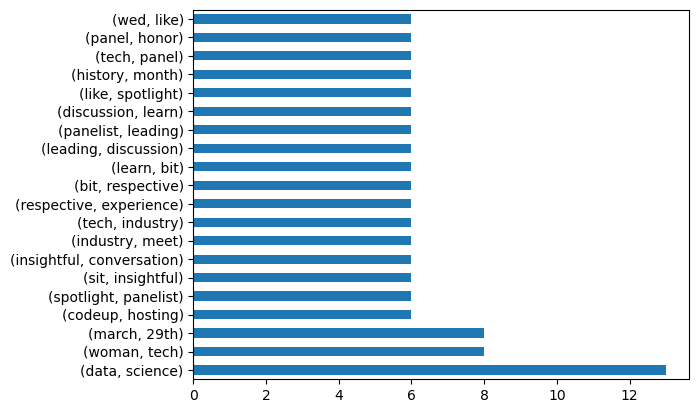

In [134]:
pd.Series(nltk.bigrams(blog_words)).value_counts().head(20).plot.barh()

In [135]:
img = WordCloud(background_color='White',
         ).generate(' '.join(blog_words))

In [136]:
img

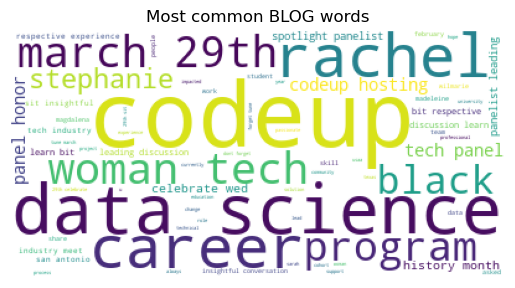

In [137]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common BLOG words')
plt.show()

In [138]:
img = WordCloud(background_color='White',
         ).generate(' '.join(bigram_list_blog))

In [139]:
img

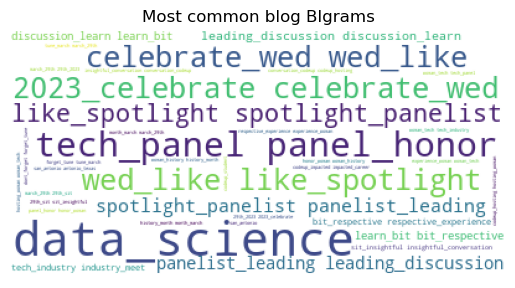

In [140]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common blog BIgrams')
plt.show()

##  BLOG TRIgrams 

In [141]:
blog_trigrams = list(nltk.ngrams(blog_words,3))

In [142]:
trigram_list_blog = ['_'.join(i) for i in blog_trigrams]

<AxesSubplot:>

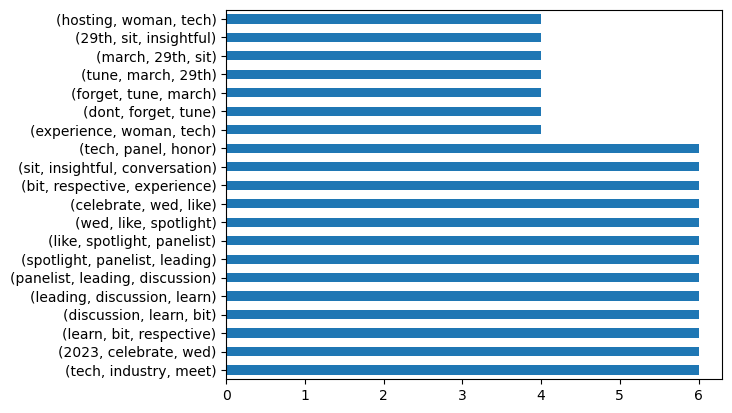

In [143]:
pd.Series(nltk.ngrams(blog_words,3)).value_counts().head(20).plot.barh()

In [154]:
img = WordCloud(colormap='ocean',background_color='white',
         ).generate(' '.join(trigram_list_blog))

In [155]:
img

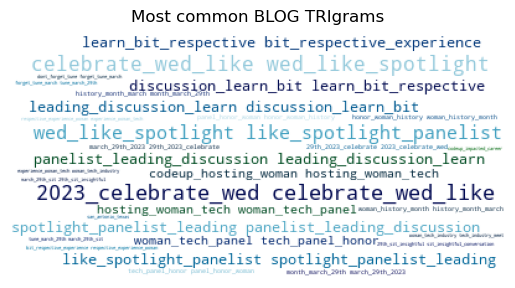

In [156]:
plt.imshow(img)
plt.axis('off')
plt.title('Most common BLOG TRIgrams')
plt.show()